가설 1. 근로 기간이 짧을 수록 대출등급이 낮을 것이다. \
가설 2. 연간 소득이 낮을 수록 대출등급이 낮을 것이다. \
가설 3. 부채대비 소득비율이 높을 수록 대출 등급이 높을 것이다.\
가설 4. 연체 횟수가 많을 수록 대출등급이 낮을 것이다.\
가설 5. (상환원금+이자) / 대출금액 의 비율이 높을 수록 대출등급이 높을 것이다.

In [27]:
import sklearn as sklean
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [28]:
pro_df = pd.read_csv('C:/Users/user/AppData/Local/Programs/Python/Python312/open_ha/train_ha.csv',sep=',' )
print(pro_df.head(3))
print(pro_df.info())

            ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0  TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1  TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2  TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   

   부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0        18.90    15  부채 통합             0       0       0.0    0.0    0.0    C  
1        22.33    21  주택 개선             0  373572  234060.0    0.0    0.0    B  
2         8.60    14  부채 통합             0  928644  151944.0    0.0    0.0    A  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        9

In [29]:
pro_df[['ID']].drop_duplicates()

,ID
0,TRAIN_00000
1,TRAIN_00001
2,TRAIN_00002
3,TRAIN_00003
4,TRAIN_00004
...,...
96289,TRAIN_96289
96290,TRAIN_96290
96291,TRAIN_96291
96292,TRAIN_96292


In [30]:
pro_df2 = pro_df.drop(['ID'], axis=1)
pro_df2['상환금액'] = pro_df['총상환원금'] + pro_df['총상환이자']
pro_df2['상환비율'] = pro_df2['상환금액'] / pro_df['대출금액']
pro_df2.head(3)
pro_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  object 
 2   근로기간          96294 non-null  object 
 3   주택소유상태        96294 non-null  object 
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   대출목적          96294 non-null  object 
 8   최근_2년간_연체_횟수  96294 non-null  int64  
 9   총상환원금         96294 non-null  int64  
 10  총상환이자         96294 non-null  float64
 11  총연체금액         96294 non-null  float64
 12  연체계좌수         96294 non-null  float64
 13  대출등급          96294 non-null  object 
 14  상환금액          96294 non-null  float64
 15  상환비율          96294 non-null  float64
dtypes: float64(6), int64(5), object(5)
memory usage: 11.8+ MB


In [31]:
def get_loan_month(mt):
    return int(mt.strip().replace('months', ''))

pro_df2['대출기간'] = pro_df2['대출기간'].apply(get_loan_month)
pro_df2[['대출기간']]

,대출기간
0,36
1,60
2,36
3,36
4,60
...,...
96289,36
96290,60
96291,36
96292,36


In [32]:
#pro_df2 = pro_df2.drop(['대출기간','상환금액'], axis=1)

In [33]:
pro_df2.describe(include='all')

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환금액,상환비율
count,9.629400e+04,96294.000000,96294,96294,9.629400e+04,96294.000000,96294.000000,96294,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294,9.629400e+04,96294.000000
unique,NaN,NaN,16,4,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
top,NaN,NaN,10+ years,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN,B,NaN,NaN
freq,NaN,NaN,31585,47934,NaN,NaN,NaN,55150,NaN,NaN,NaN,NaN,NaN,28817,NaN,NaN
mean,1.830400e+07,43.929466,NaN,NaN,9.392672e+07,19.379590,25.304827,NaN,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,NaN,1.250732e+06,0.070407
std,1.032908e+07,11.288582,NaN,NaN,9.956871e+07,33.569559,12.088566,NaN,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,NaN,1.274046e+06,0.054308
min,1.200000e+06,36.000000,NaN,NaN,0.000000e+00,0.000000,4.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000e+00,0.000000
25%,1.020000e+07,36.000000,NaN,NaN,5.760000e+07,12.650000,17.000000,NaN,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,NaN,4.802250e+05,0.032797
50%,1.680000e+07,36.000000,NaN,NaN,7.800000e+07,18.740000,24.000000,NaN,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,NaN,9.449160e+05,0.065304
75%,2.400000e+07,60.000000,NaN,NaN,1.128000e+08,25.540000,32.000000,NaN,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,NaN,1.680996e+06,0.096484


1. 부채_대비_소득_비율 9999
2. 총계좌수 169
3. 최근_2년간_연체_횟수 30

In [34]:
pro_df2[pro_df2['부채_대비_소득_비율']>100]


,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환금액,상환비율
12498,4440000,36,Unknown,MORTGAGE,0,9999.00,20,신용 카드,2,205356,85884.0,0.0,0.0,C,291240.0,0.065595
29129,14400000,36,Unknown,RENT,1440000,672.52,13,부채 통합,0,595344,442860.0,0.0,0.0,E,1038204.0,0.072097
62125,18000000,36,Unknown,MORTGAGE,10440000,120.66,26,부채 통합,0,396456,200328.0,0.0,0.0,D,596784.0,0.033155
62765,7860000,36,Unknown,MORTGAGE,2124000,1092.52,25,신용 카드,2,0,0.0,0.0,0.0,D,0.0,0.000000
81970,14400000,60,Unknown,MORTGAGE,11694000,125.25,53,부채 통합,0,302736,412116.0,0.0,0.0,D,714852.0,0.049642
83954,24000000,60,< 1 year,RENT,32400000,100.09,16,부채 통합,0,248064,339732.0,0.0,0.0,E,587796.0,0.024491


In [35]:
pro_df2[pro_df2['최근_2년간_연체_횟수']>15]

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환금액,상환비율
3038,18600000,36,8 years,MORTGAGE,68400000,18.43,59,부채 통합,16,905088,271344.0,0.0,0.0,B,1176432.0,0.063249
16682,11700000,36,10+ years,MORTGAGE,127200000,10.88,35,기타,16,1293252,725904.0,0.0,0.0,D,2019156.0,0.172577
18893,9600000,36,2 years,RENT,69600000,22.86,59,신용 카드,18,476016,120468.0,0.0,0.0,A,596484.0,0.062134
36237,20160000,36,10+ years,RENT,67200000,21.24,40,부채 통합,17,1533672,1718580.0,0.0,0.0,G,3252252.0,0.161322
48437,42000000,36,2 years,OWN,330000000,9.48,46,부채 통합,16,2941968,1360884.0,0.0,0.0,C,4302852.0,0.102449
57431,18000000,36,< 1 year,RENT,168000000,10.23,64,기타,30,819192,391788.0,0.0,0.0,C,1210980.0,0.067277
71242,3510000,36,10+ years,MORTGAGE,73200000,15.60,57,신용 카드,16,160584,74484.0,0.0,0.0,C,235068.0,0.066971
90386,6840000,36,2 years,RENT,42000000,24.98,30,기타,18,289380,201540.0,0.0,0.0,E,490920.0,0.071772


In [36]:
pro_df2[pro_df2['총계좌수']==169]

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환금액,상환비율
57818,14610000,36,4 years,MORTGAGE,102000000,30.13,169,부채 통합,0,1272132,792408.0,0.0,0.0,D,2064540.0,0.14131


1. 부채_대비_소득_비율 9999 -> 그냥 사용 (비약적으로 높긴 하나 잘못된 변수는 아님)
2. 총계좌수 169 -> 그냥 사용 (가능하다고 생각)
3. 최근_2년간_연체_횟수 30 -> 그냥 사용(가능하다고 생각)

In [37]:
cate_list=['근로기간','주택소유상태','대출등급']

for a in cate_list:
    print(pro_df2[a].value_counts())

근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64
주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64
대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64


In [38]:
def work_day(a):
    if a in ['< 1 year','<1 year']:
        return '0'
    elif a in['1 year','1 years']:
        return '1'
    elif a in ['10+ years','10+years']:
        return '10'
    elif a in ['3']:
        return '3'
    elif a in ['Unknown']:
        return '0'
    else :
        return a

pro_df2['근로기간_수정']=pro_df2['근로기간'].apply(work_day)
pro_df2['근로기간_수정']=pro_df2['근로기간_수정'].str.replace('years',"")
pro_df2['근로기간_수정']=pro_df2['근로기간_수정'].str.replace('year',"")
pro_df2=pro_df2[pro_df2.근로기간_수정 !='NAN']
pro_df2['근로기간_수정'].value_counts()


근로기간_수정
10    32481
0     13815
2      8450
3      7581
1      6305
5      5665
4      5588
8      4888
6      3874
7      3814
9      3744
3        89
Name: count, dtype: int64

In [39]:
pro_df2['근로기간_수정']=pro_df2['근로기간_수정'].astype('str')


In [40]:
pro_df2['근로기간_수정']=pro_df2['근로기간_수정'].astype('float64')
pro_df2['근로기간_수정'].value_counts()

근로기간_수정
10.0    32481
0.0     13815
2.0      8450
3.0      7670
1.0      6305
5.0      5665
4.0      5588
8.0      4888
6.0      3874
7.0      3814
9.0      3744
Name: count, dtype: int64

In [41]:
pro_df2 = pro_df2.drop(pro_df2[pro_df2['부채_대비_소득_비율']==9999].index)

In [42]:
def get_grade_num(x):
    if x == 'A': return 6
    if x == 'B': return 5
    if x == 'C': return 4
    if x == 'D': return 3
    if x == 'E': return 2
    if x == 'F': return 1
    if x == 'G': return 0

pro_df2['대출등급'] = pro_df2['대출등급'].apply(lambda x : get_grade_num(x))

In [43]:
def get_plus_col(df):
    df['상환부담율'] = df['총상환이자'] / df['대출금액']
    df['상환율'] = df['총상환원금'] / df['대출금액']
    df['대출_대비_총상환금_비율'] = (df['총상환원금'] + df['총상환이자']) / df['대출금액']
    df['잔여상환금_대비_연체금액_비율'] = df['총연체금액'] / (df['대출금액'] - df['총상환원금'])
    df['연체계좌비율'] = df['연체계좌수'] / df['총계좌수']
get_plus_col(pro_df2)
pro_df2.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,...,연체계좌수,대출등급,상환금액,상환비율,근로기간_수정,상환부담율,상환율,대출_대비_총상환금_비율,잔여상환금_대비_연체금액_비율,연체계좌비율
0,12480000,36,6 years,RENT,72000000,18.90,15,부채 통합,0,0,...,0.0,4,0.0,0.000000,6.0,0.000000,0.000000,0.000000,0.0,0.0
1,14400000,60,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,...,0.0,5,607632.0,0.042197,10.0,0.016254,0.025943,0.042197,0.0,0.0
2,12000000,36,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,...,0.0,6,1080588.0,0.090049,5.0,0.012662,0.077387,0.090049,0.0,0.0
3,14400000,36,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,...,0.0,4,478932.0,0.033259,8.0,0.010632,0.022627,0.033259,0.0,0.0
4,18000000,60,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,...,0.0,5,377496.0,0.020972,0.0,0.008275,0.012697,0.020972,0.0,0.0


In [44]:
def get_home(chr):
    if chr in ['MORTGAGE', 'RENT', 'ANY']:
        return 0
    else:
        return 1

pro_df2['주택소유여부'] = pro_df2['주택소유상태'].apply(get_home)
pro_df2[['주택소유여부']]

,주택소유여부
0,0
1,0
2,0
3,0
4,0
...,...
96289,0
96290,0
96291,0
96292,0


In [45]:
pro_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96293 entries, 0 to 96293
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   대출금액              96293 non-null  int64  
 1   대출기간              96293 non-null  int64  
 2   근로기간              96293 non-null  object 
 3   주택소유상태            96293 non-null  object 
 4   연간소득              96293 non-null  int64  
 5   부채_대비_소득_비율       96293 non-null  float64
 6   총계좌수              96293 non-null  int64  
 7   대출목적              96293 non-null  object 
 8   최근_2년간_연체_횟수      96293 non-null  int64  
 9   총상환원금             96293 non-null  int64  
 10  총상환이자             96293 non-null  float64
 11  총연체금액             96293 non-null  float64
 12  연체계좌수             96293 non-null  float64
 13  대출등급              96293 non-null  int64  
 14  상환금액              96293 non-null  float64
 15  상환비율              96293 non-null  float64
 16  근로기간_수정           96293 non-null  float64
 17

In [85]:
pro_df2['대출등급'].value_counts()

대출등급
5    28817
4    27622
6    16772
3    13354
2     7354
1     1954
0      420
Name: count, dtype: int64

In [84]:
#pro_df2[(pro_df2['상환율'] == 0) & (pro_df2['대출등급'] == 0)]
pro_df2[(pro_df2['연체계좌수'] == 4)]


,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,...,대출등급,상환금액,상환비율,근로기간_수정,상환부담율,상환율,대출_대비_총상환금_비율,잔여상환금_대비_연체금액_비율,연체계좌비율,주택소유여부
86578,6000000,36,10+ years,OWN,45600000,28.49,29,부채 통합,4,138036,...,4,192600.0,0.0321,10.0,0.009094,0.023006,0.0321,0.0,0.137931,1


C:\Users\user\AppData\Local\Temp\ipykernel_22732\466808246.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.00091504 0.01134685]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pivot.loc[pivot['sum'] != 0, :] = pivot.loc[pivot['sum'] != 0, :].div(pivot['sum'], axis=0)
C:\Users\user\AppData\Local\Temp\ipykernel_22732\466808246.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.00418747 0.05293101]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pivot.loc[pivot['sum'] != 0, :] = pivot.loc[pivot['sum'] != 0, :].div(pivot['sum'], axis=0)
C:\Users\user\AppData\Local\Temp\ipykernel_22732\466808246.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.

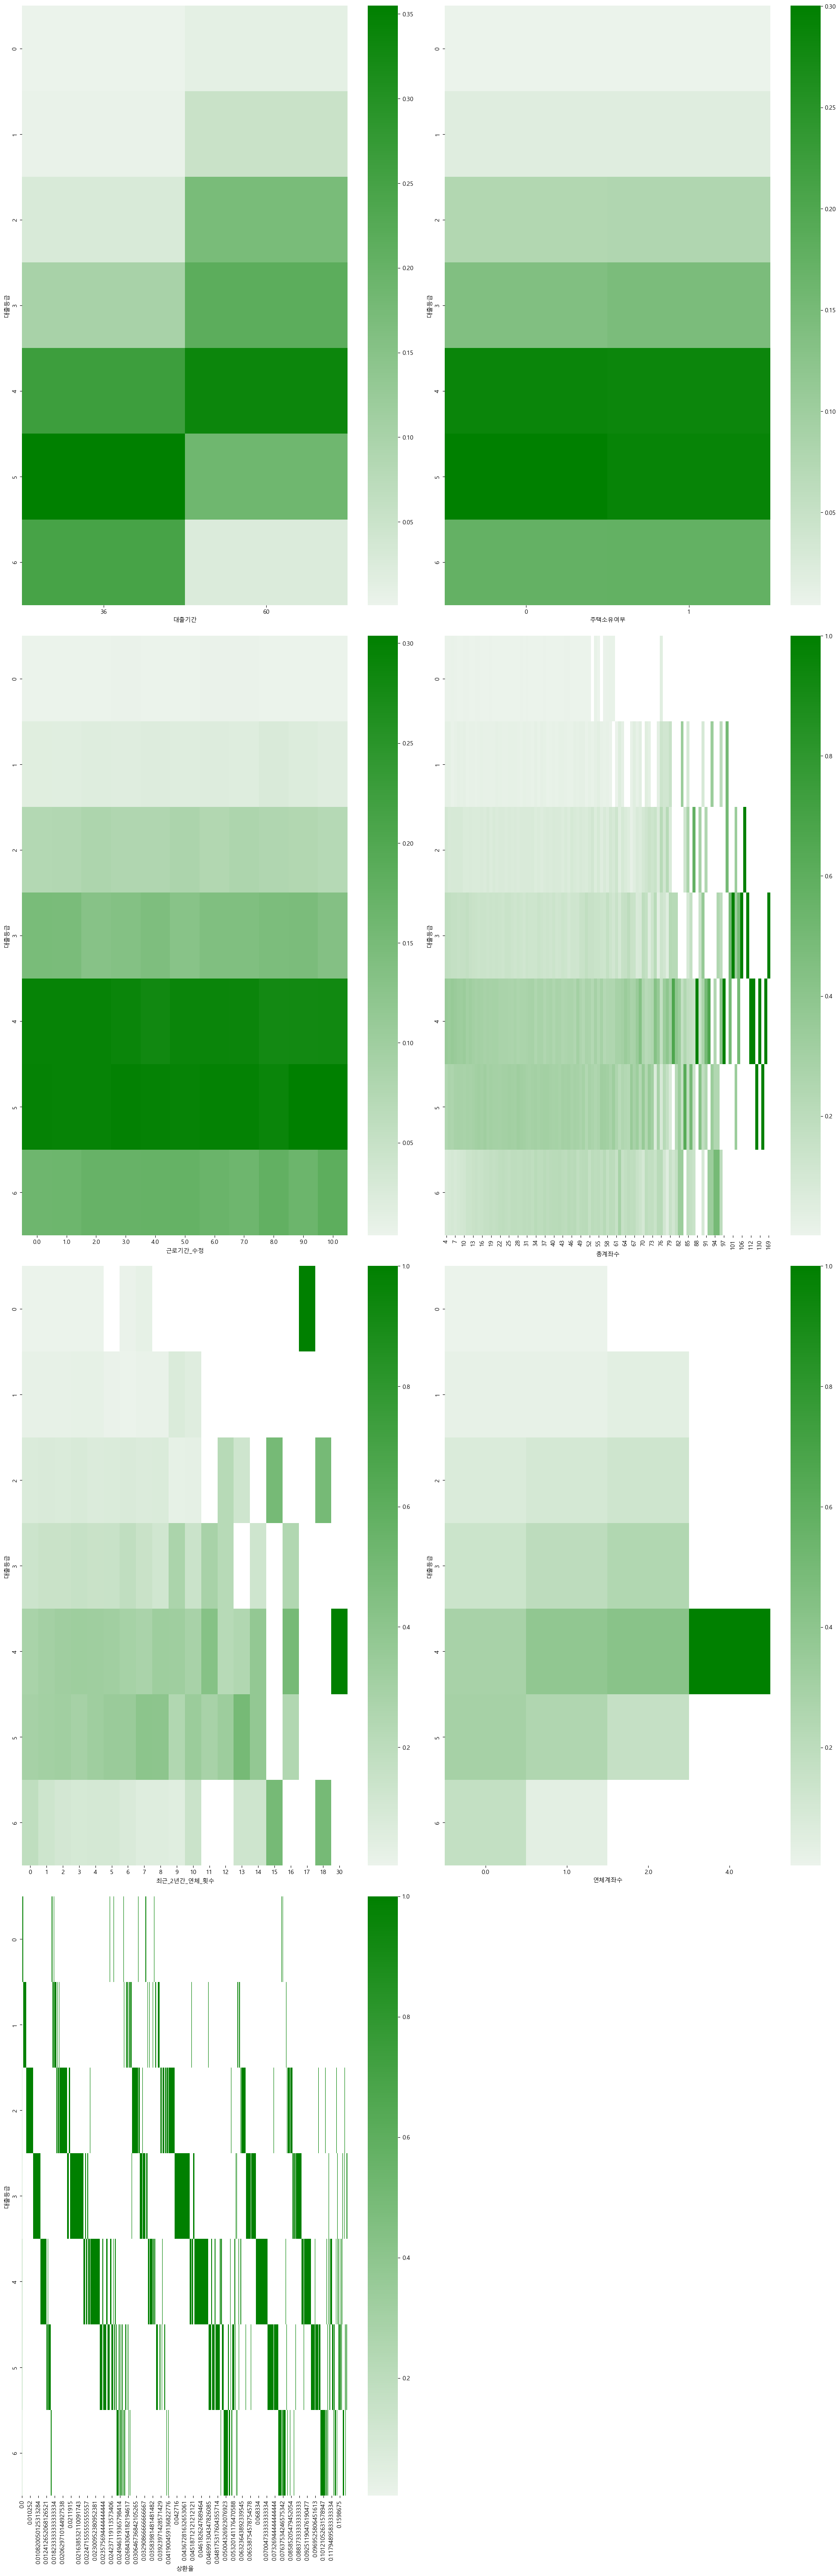

In [77]:
features = ['대출기간', '주택소유여부', '근로기간_수정', '총계좌수', '최근_2년간_연체_횟수', '연체계좌수', '상환율']

num_features = len(features)
num_rows = (num_features + 1) // 2  # Ensure at least 2 rows

plt.figure(figsize=(20, 15 * num_rows))

for idx, feature in enumerate(features):
    plt.subplot(num_rows, 2, idx + 1)
    
    pivot = pro_df2.pivot_table(index=feature, columns='대출등급', aggfunc="size")
    pivot['sum'] = pivot.sum(axis=1)
    
    # Avoid division by zero
    pivot.loc[pivot['sum'] != 0, :] = pivot.loc[pivot['sum'] != 0, :].div(pivot['sum'], axis=0)
    
    pivot = pivot.drop('sum', axis=1).T
    
    sns.heatmap(pivot, cmap=sns.light_palette('Green', as_cmap=True), annot=False)

plt.tight_layout()
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

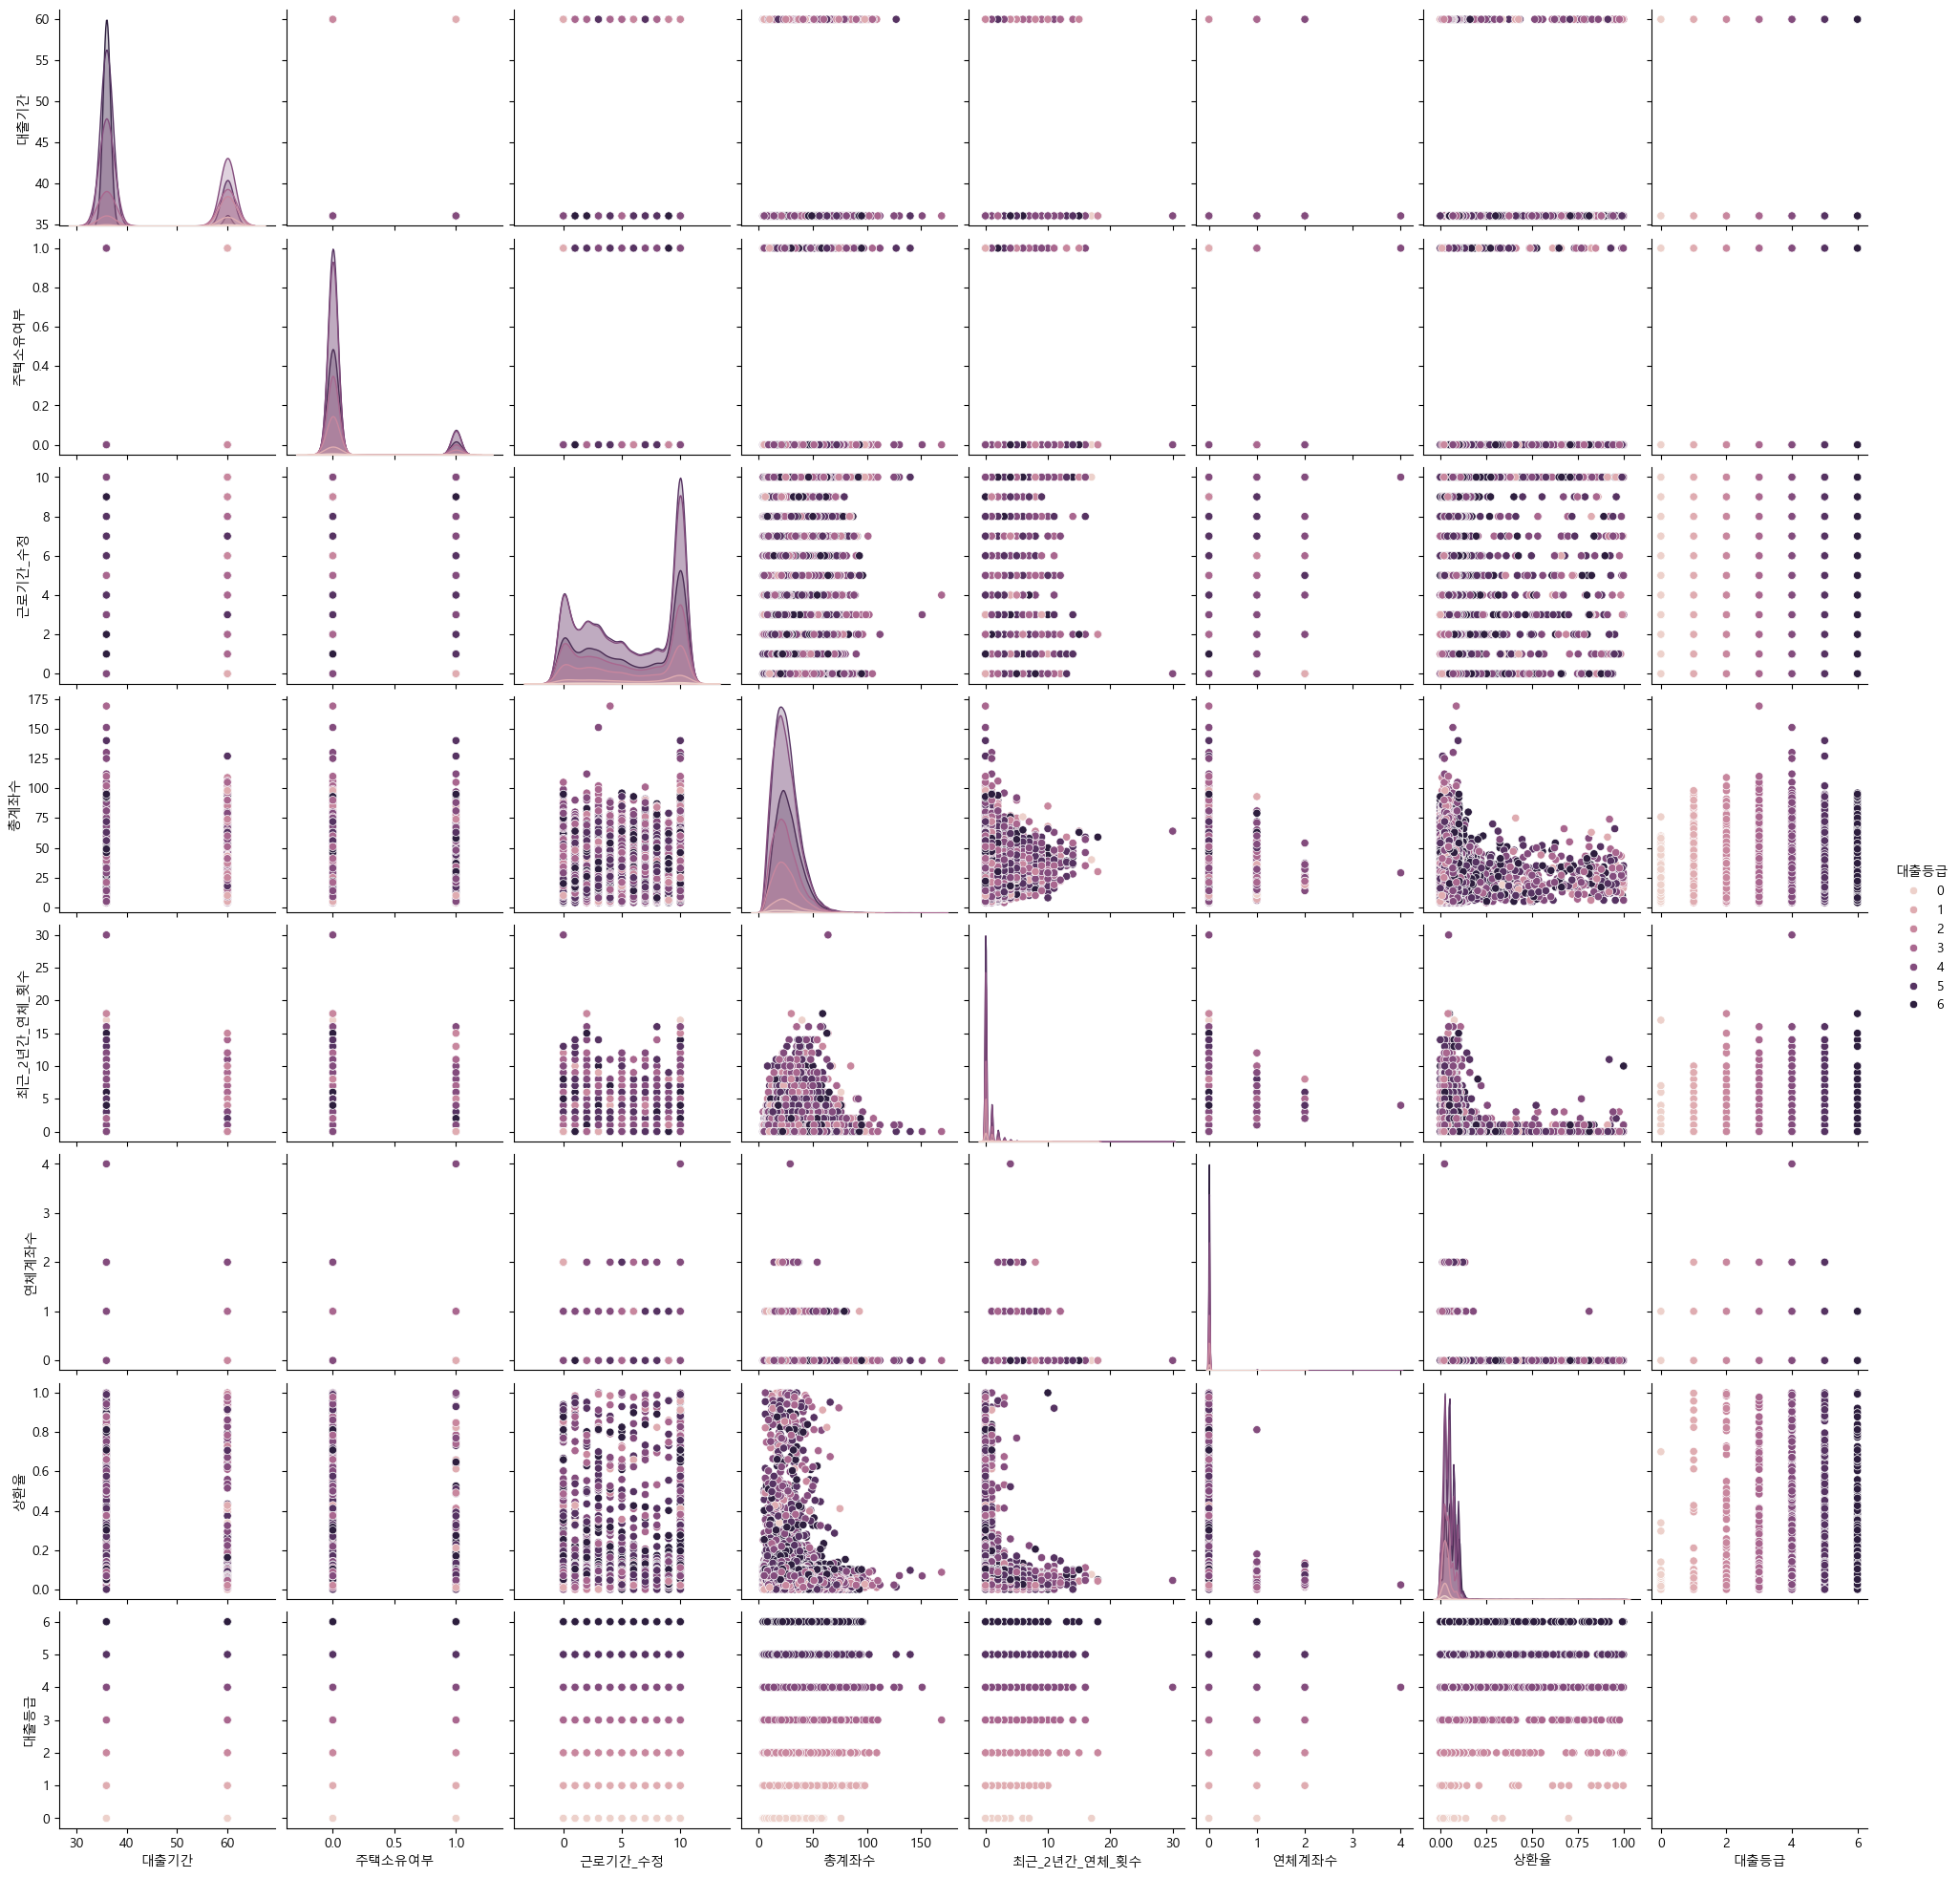

In [105]:
sns.pairplot(data=pro_df2,hue='대출등급',vars=['대출기간', '주택소유여부', '근로기간_수정', '총계좌수', '최근_2년간_연체_횟수', '연체계좌수', '상환율','대출등급'])

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

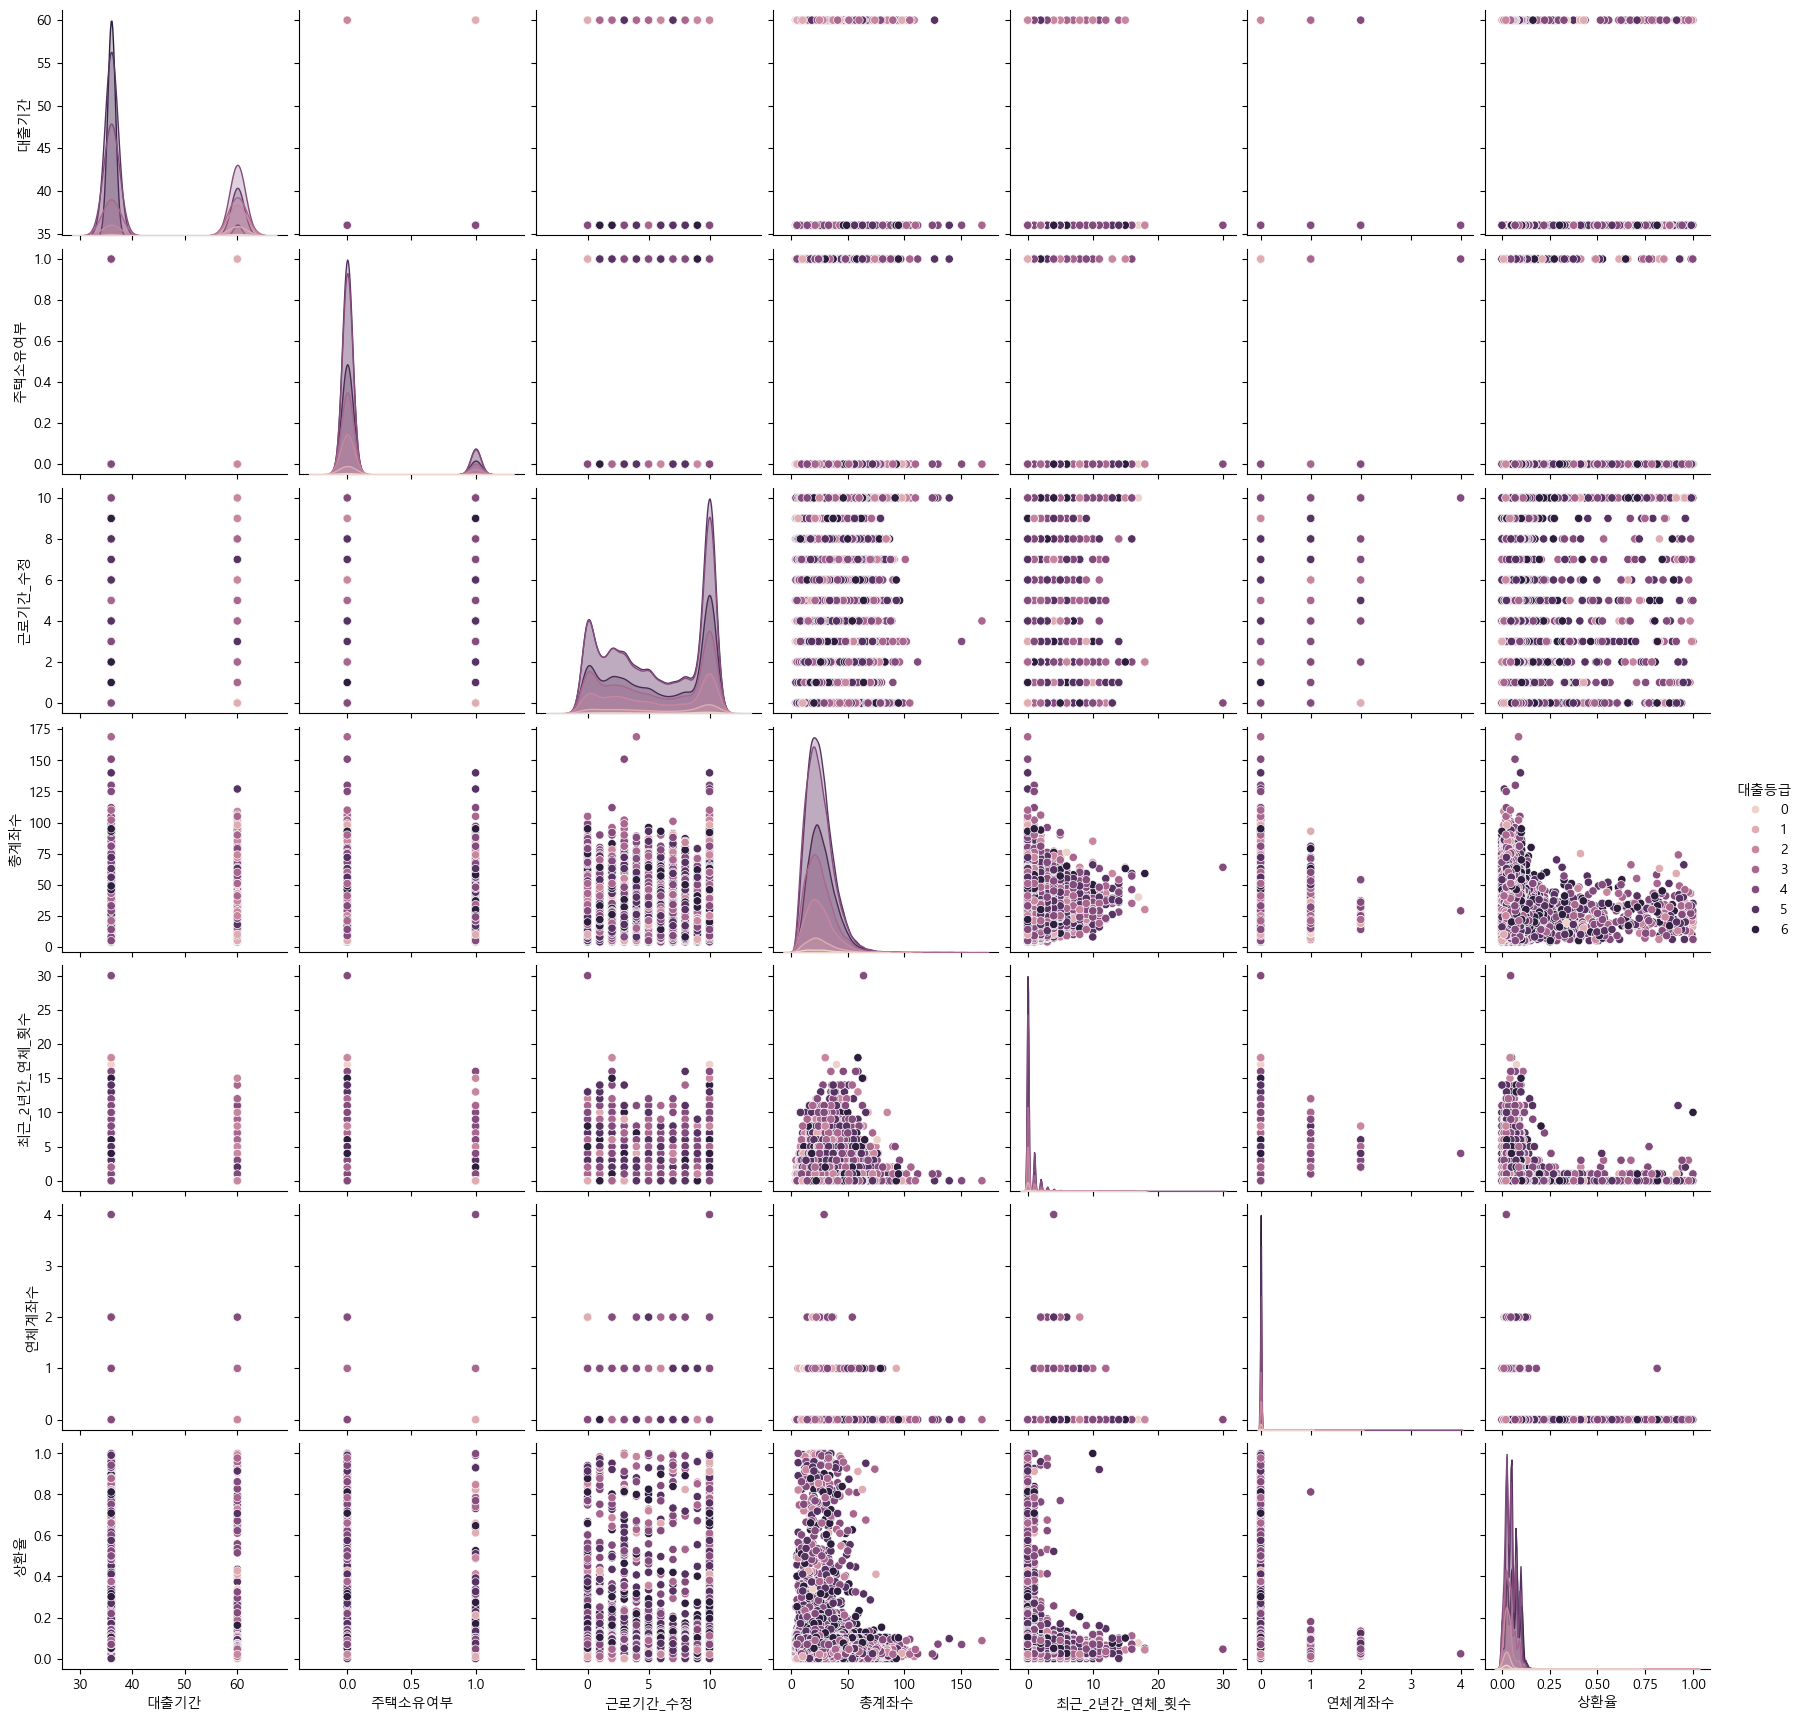

In [89]:
sns.pairplot(data=pro_df2,hue='대출등급',vars=['대출기간', '주택소유여부', '근로기간_수정', '총계좌수', '최근_2년간_연체_횟수', '연체계좌수', '상환율'])

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


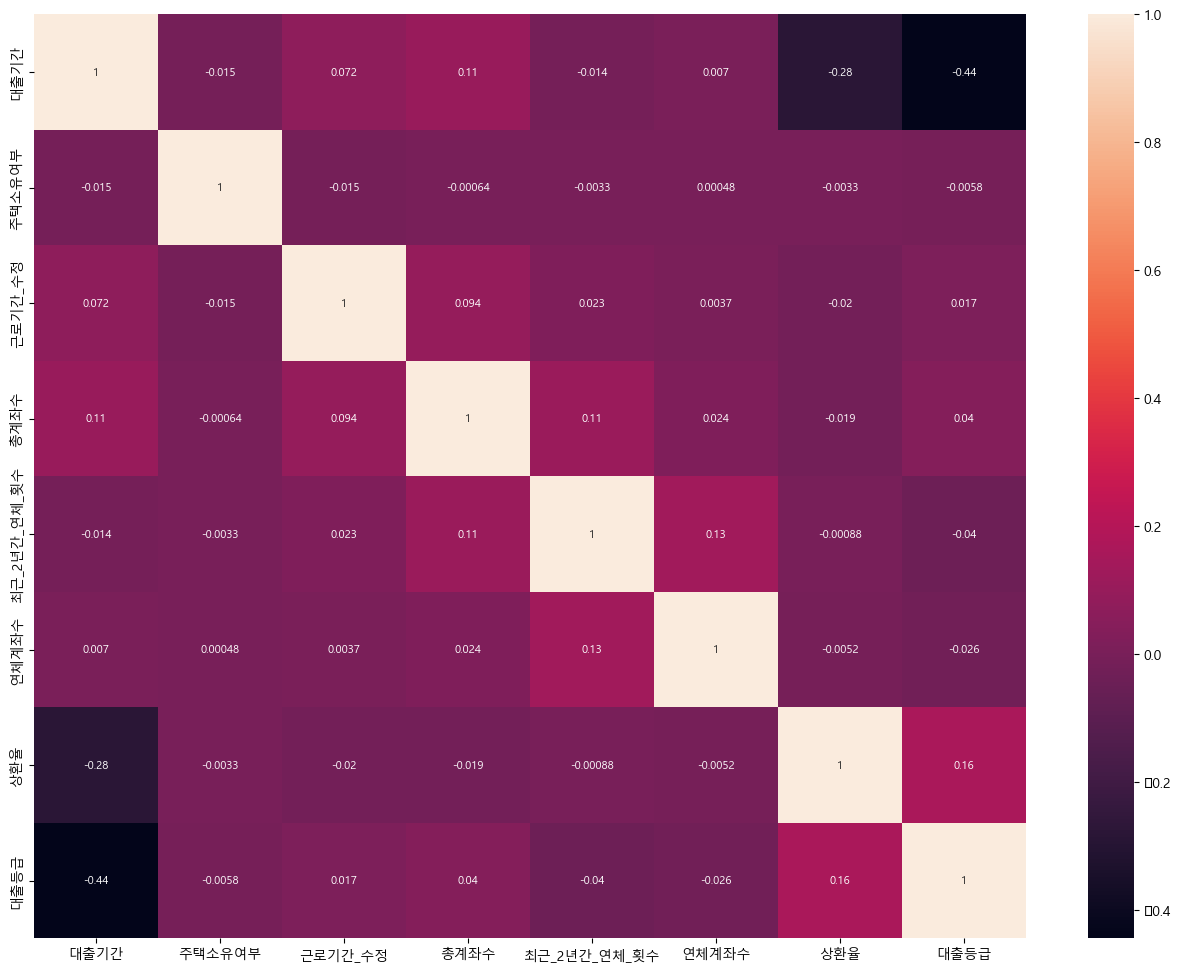

In [104]:
plt.rcParams["figure.figsize"] = (16,12)
cor_list=['대출기간', '주택소유여부', '근로기간_수정', '총계좌수', '최근_2년간_연체_횟수', '연체계좌수', '상환율','대출등급']
cor_df=pro_df2[cor_list]
sns.heatmap(cor_df.corr(), annot = True, annot_kws={"size": 8})
plt.show()

In [46]:
X_features=['근로기간_수정','주택소유여부','상환율','부채_대비_소득_비율','연간소득']
X=pro_df2[X_features]
y=pro_df2['대출등급']

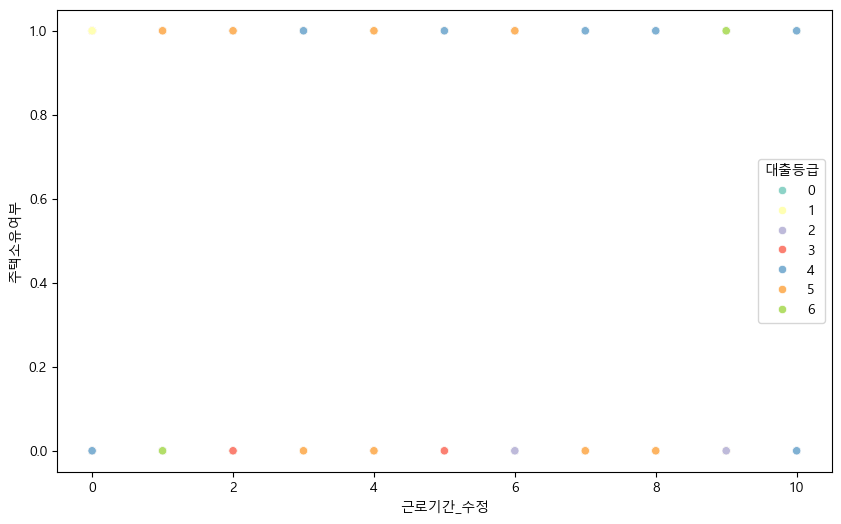

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pro_df2, x='근로기간_수정', y='주택소유여부', hue='대출등급' ,palette='Set3')
plt.show()

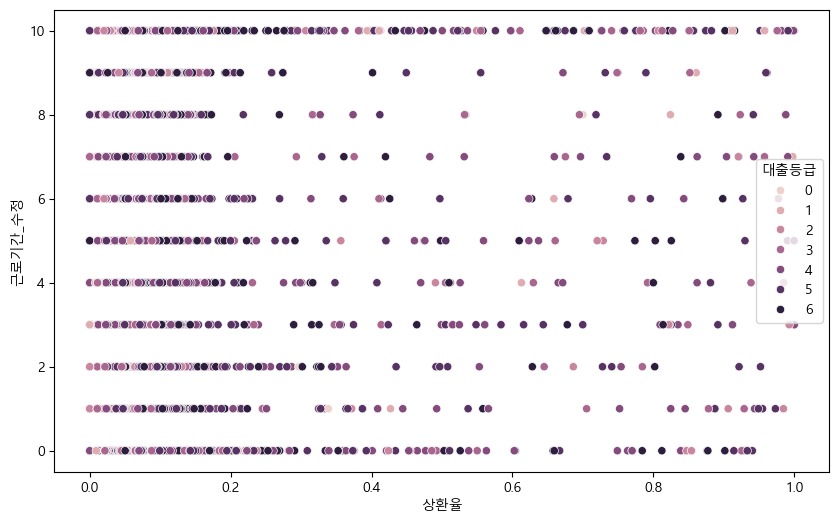

In [62]:
order_grade = ['A','B','C','D','E','F','G']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pro_df2, x='상환율', y='근로기간_수정', hue='대출등급', hue_order=order_grade)
plt.show()